# Supplementary Figure 2. Multiple DROSHA cleavage patterns
A-F. IGV examples of each cleavage pattern  
G. Association of inverted and productive processing  
H. Selection of Cleavage Productivity and Cleavage Specificity cutoffs  
I. Cutoff for alternative cleavage sites  
J. Cutoff for nick cleavage  
K. Terminal loop size  

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'Seungchan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by Seungchan Baek at 2020-10-13.


In [2]:
home = '/casa/bsc/projects/1_DCS/2004_paper_prep/'
utilpath = '/casa/bsc/notebooks/'
%cd $home

/casa/bsc/projects/1_DCS/2004_paper_prep


In [3]:
from __future__ import division
import sys; sys.path.append(utilpath)
from util import *
from basic import gen_result_dir
resultpath = gen_result_dir('results/')
print 'resultpath:', resultpath

resultpath: results/201013/


In [4]:
import pandas as pd
import numpy as np
import re
import gzip
from matplotlib import pyplot as plt
from matplotlib import lines, gridspec
from collections import defaultdict
from scipy.stats import pearsonr, mannwhitneyu, sem
%matplotlib inline

In [5]:
LIBRARIES = [ 'set1', 'set2', 'set3', 'set4', 'set5' ]

#### Import supplementary tables

In [6]:
s1 = pd.read_csv('supplementary/201012_s1_pri-info.csv', header=1, index_col=0)
s2 = pd.read_csv('supplementary/201012_s2_pri-construct.csv', header=1, index_col=0)
s3 = pd.read_csv('supplementary/201012_s3_input.csv', header=1, index_col=0)
s4 = pd.read_csv('supplementary/201012_s4_cleavage-product.csv', header=1)
s5 = pd.read_csv('supplementary/201012_s5_pri-structure.csv', header=1, index_col=0)
s6 = pd.read_csv('supplementary/201012_s6_cleavage-patterns.csv', header=1, index_col=0)
print 's1:\t%s'%', '.join(list(s1.columns))
print 's2:\t%s'%', '.join(list(s2.columns)[:6])
print 's3:\t%s'%', '.join(list(s3.columns))
print 's4:\t%s'%', '.join(list(s4.columns)[:9])
print 's5:\t%s'%', '.join(list(s5.columns)[-10:])
print 's6:\t%s'%', '.join(list(s6.columns)[-4:])

s1:	5p mature, 5p sequence, 3p mature, 3p sequence, Note
s2:	Chr, Start, End, Strand, Construct sequence, 100way phyloP scores (pre-miRNA -/+ 100nt)
s3:	set1-1, set1-2, set2, set3-1, set3-2, set4, set5-1, set5-2
s4:	Pri-miRNA, rstart, rend, pilot-1, pilot-2, set1-1, set1-2, set2-1, set2-2
s5:	117, 118, 119, 120, 121, 122, 123, 124, 125, symbolized structure
s6:	Relative position from miRBase site, Cleavage Specificity, Cleavage Imbalance, Cleavage type


In [7]:
def get_pre_position(pri):
    constructseq = s2.loc[pri, 'Construct sequence'].replace('T','U')
    seq5p = s1.loc[pri, '5p sequence']
    seq3p = s1.loc[pri, '3p sequence']
    if seq5p=='n.a.' or constructseq.find(seq5p)==-1:
        prestart = 0
    else:
        prestart = constructseq.find(seq5p)+1
    if seq3p=='n.a.' or constructseq.find(seq3p)==-1:
        preend = 125
    else:
        preend = constructseq.rfind(seq3p)+len(seq3p)
    return prestart, preend

In [8]:
allpris = s1.index
preposition = { pri:get_pre_position(pri) for pri in allpris }
print len(preposition)

1881


In [9]:
mirtrons = [ pri for pri in allpris if s1.loc[pri,'Note'].find('Mirtron')>=0 ]
capped = [ pri for pri in allpris if s1.loc[pri,'Note'].find('Capped miRNA')>=0 ]
drosensitive = [ pri for pri in allpris if s1.loc[pri,'Note'].find('DROSHA KO-sensitive')>=0 ]
fclipdetected = [ pri for pri in allpris if s1.loc[pri,'Note'].find('fCLIP site-determined')>=0 ]
dbmirs = [ pri for pri in allpris if s1.loc[pri,'Note'].find('MirGeneDB')>=0 ]
print len(mirtrons), len(capped), len(drosensitive), len(fclipdetected), len(dbmirs)

239 11 157 281 519


In [10]:
constseqs = dict(s2['Construct sequence'])
print len(constseqs)

1881


# A-F. IGV examples of each cleavage pattern

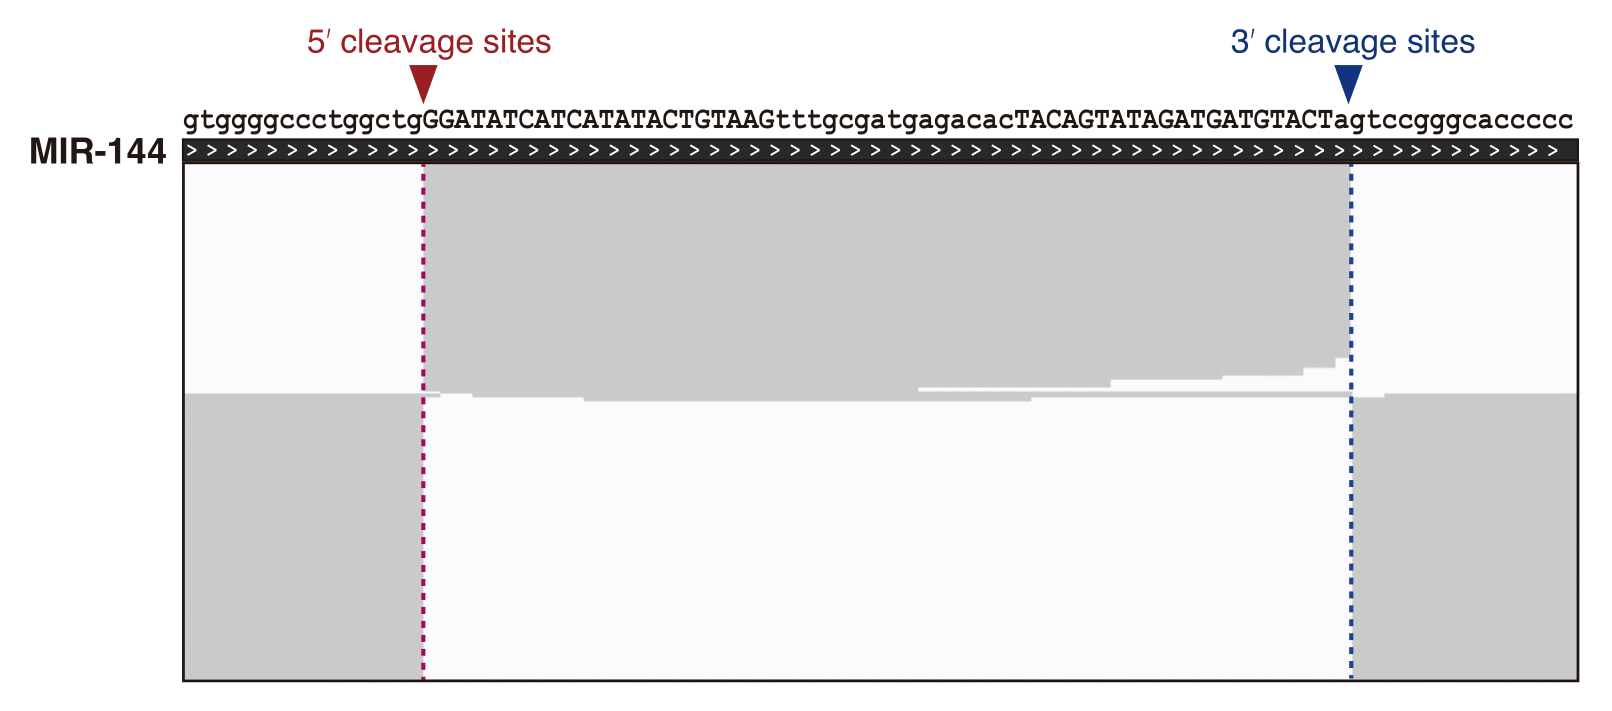

In [11]:
from IPython.display import Image
Image(filename='supplementary/figures/single_mir144-1.png', width=600)

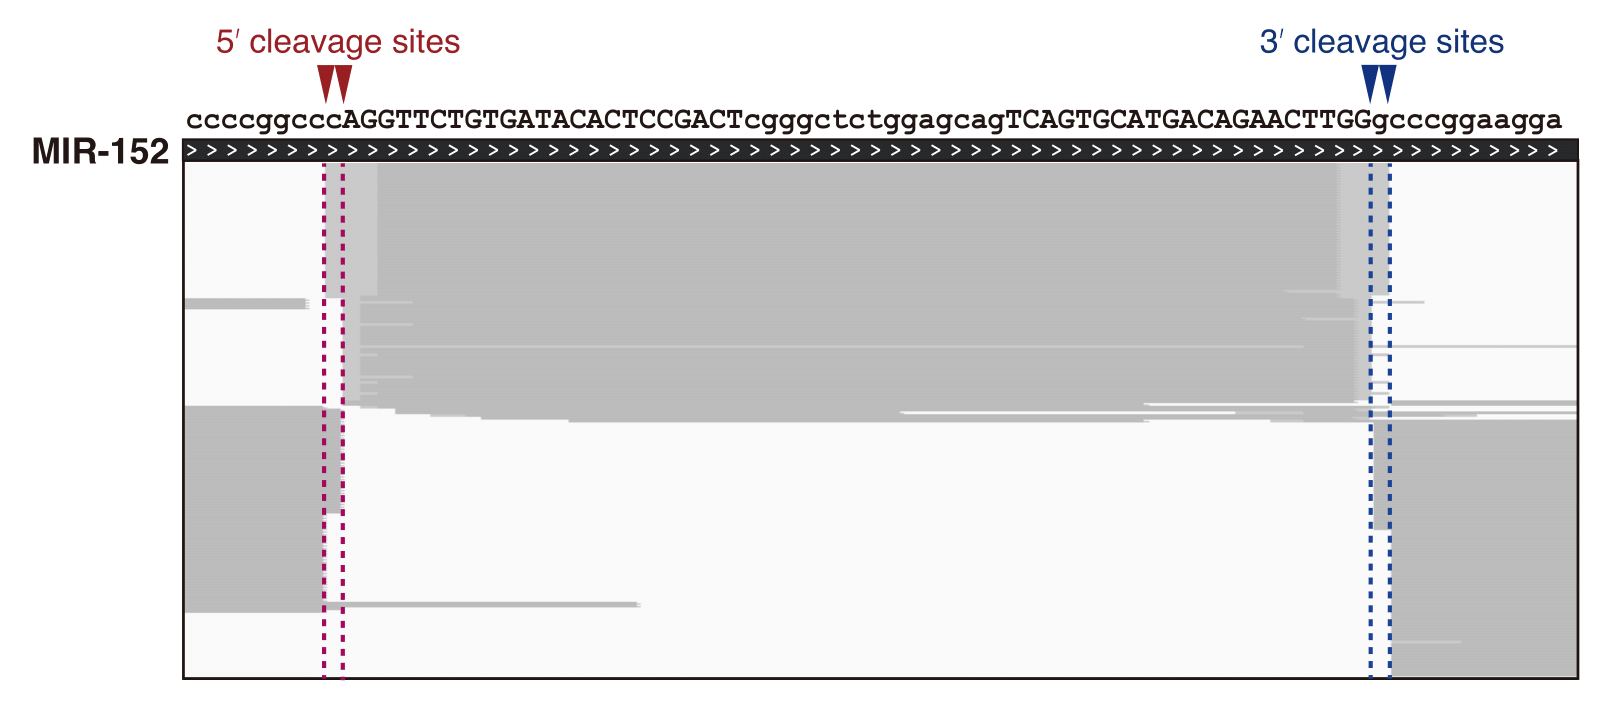

In [12]:
from IPython.display import Image
Image(filename='supplementary/figures/multi_mir152-1.png', width=600)

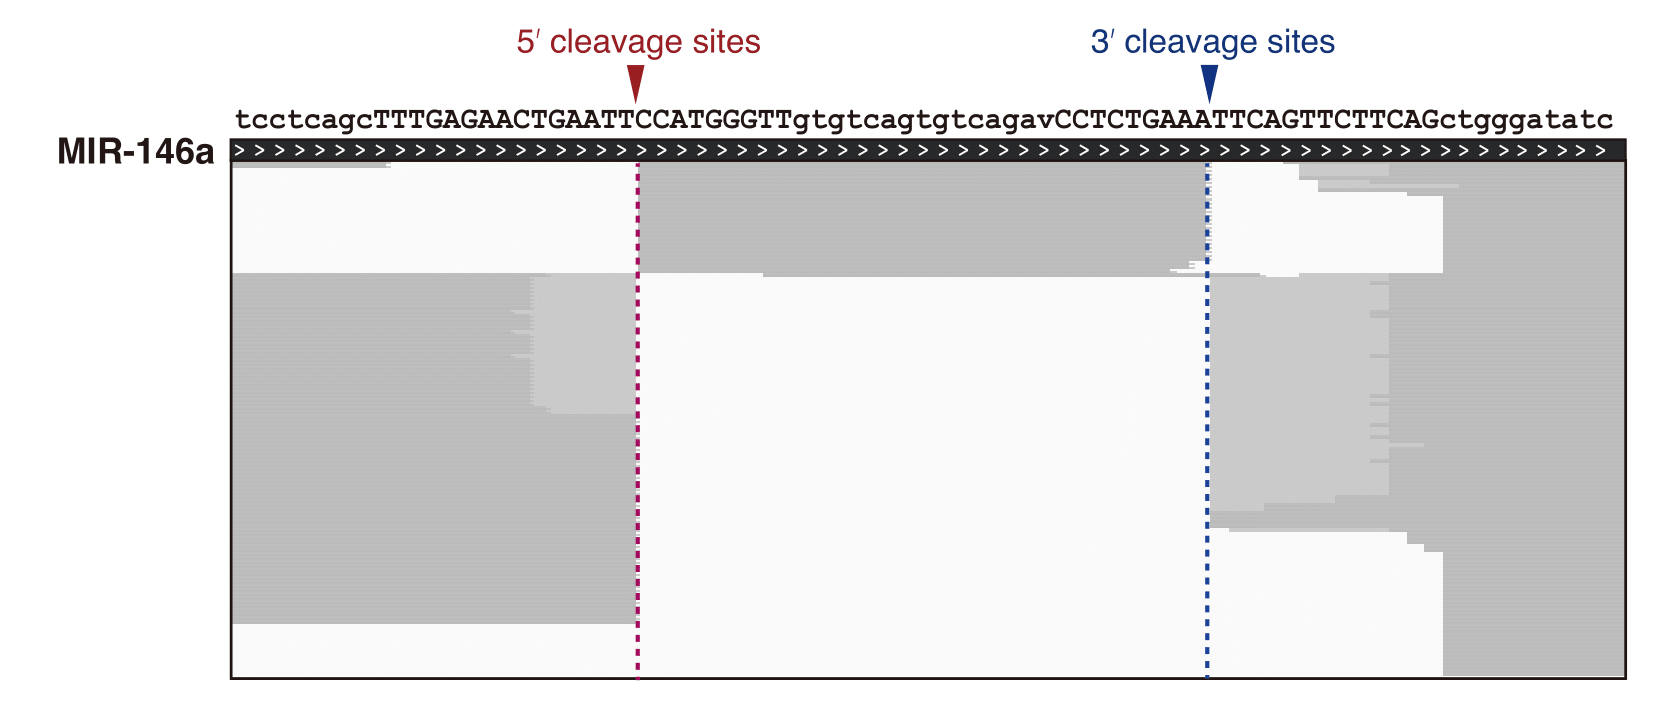

In [13]:
from IPython.display import Image
Image(filename='supplementary/figures/inverted_mir146a-1.png', width=600)

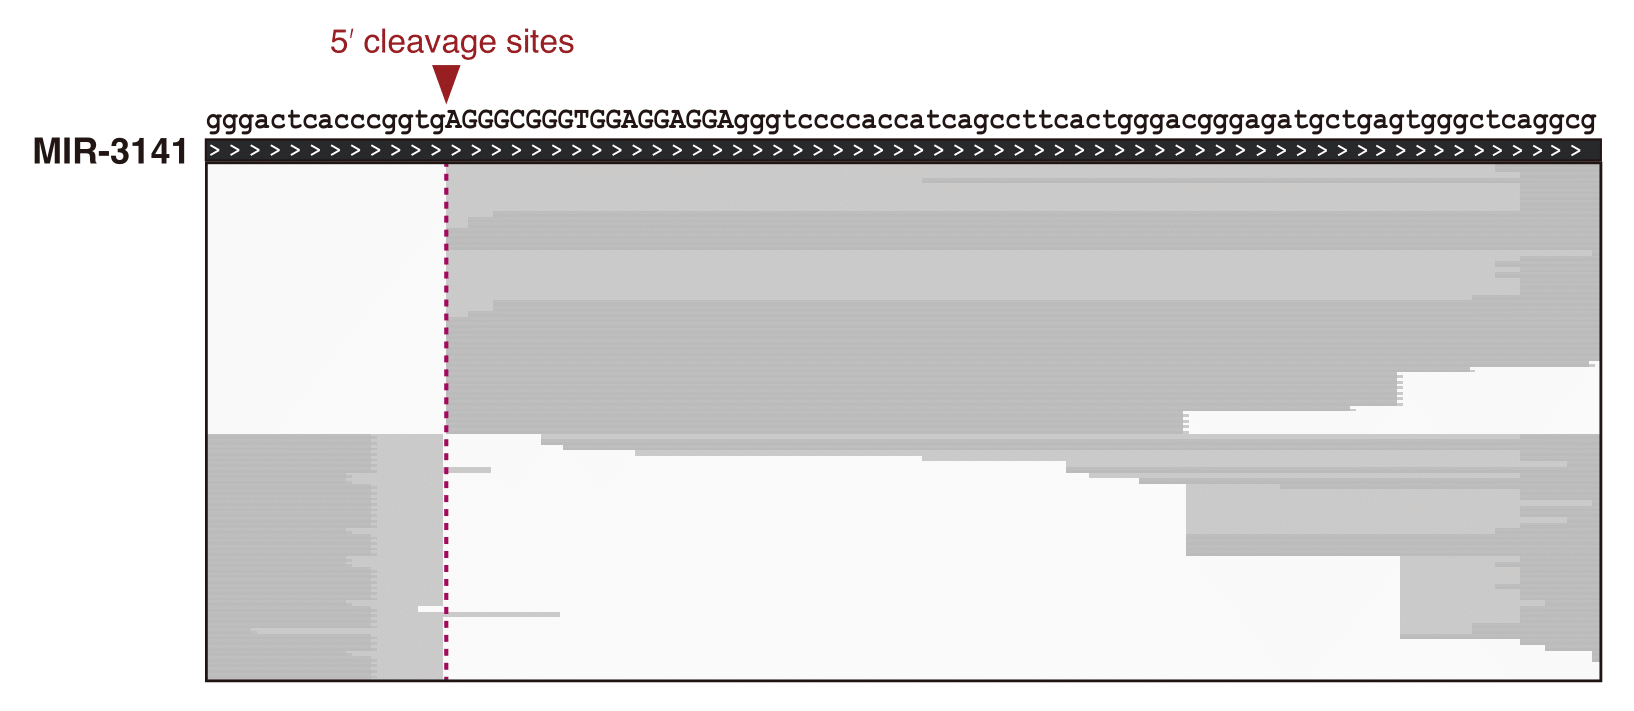

In [14]:
from IPython.display import Image
Image(filename='supplementary/figures/nick5_mir3141-1.png', width=600)

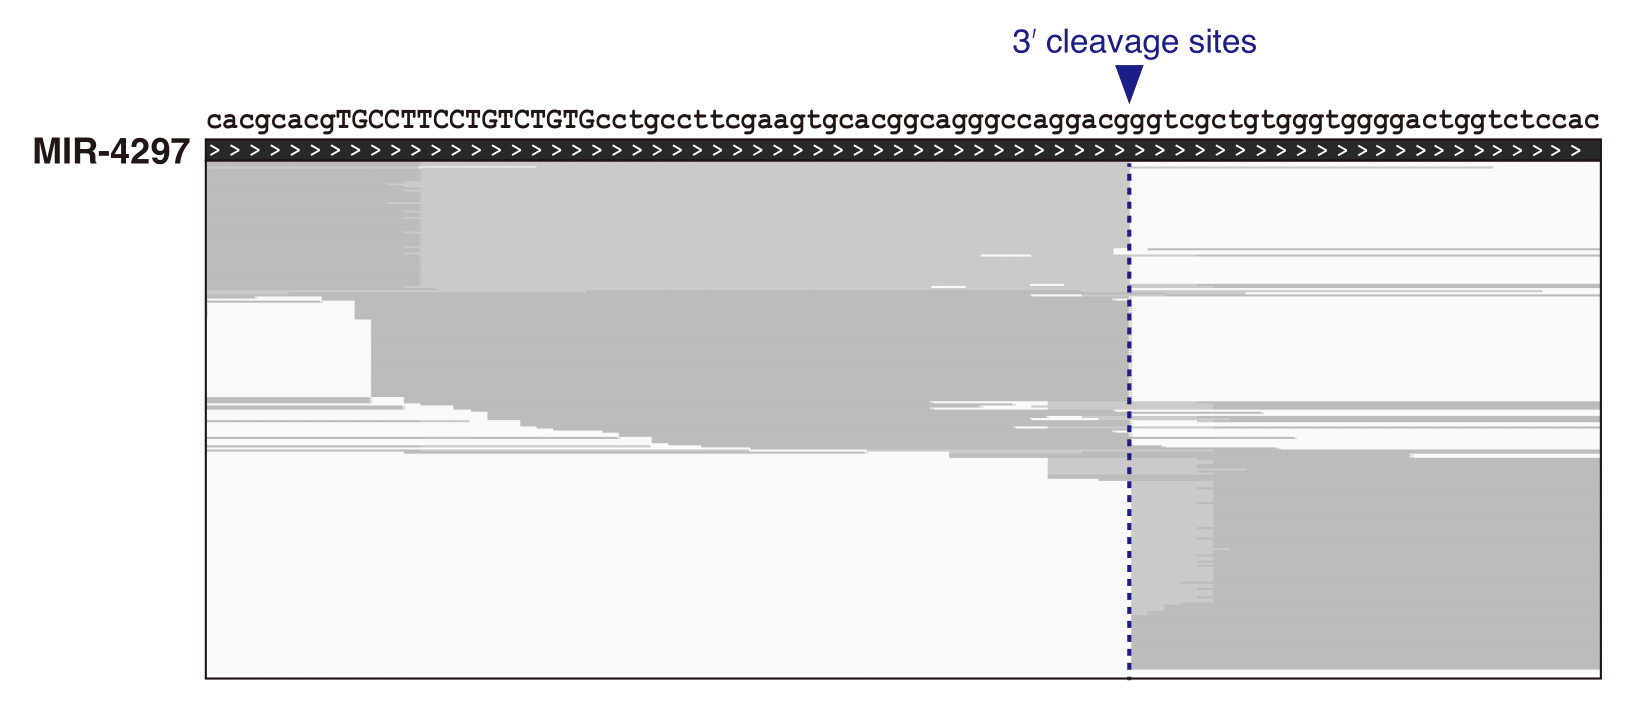

In [15]:
from IPython.display import Image
Image(filename='supplementary/figures/nick3_mir4297-1.png', width=600)

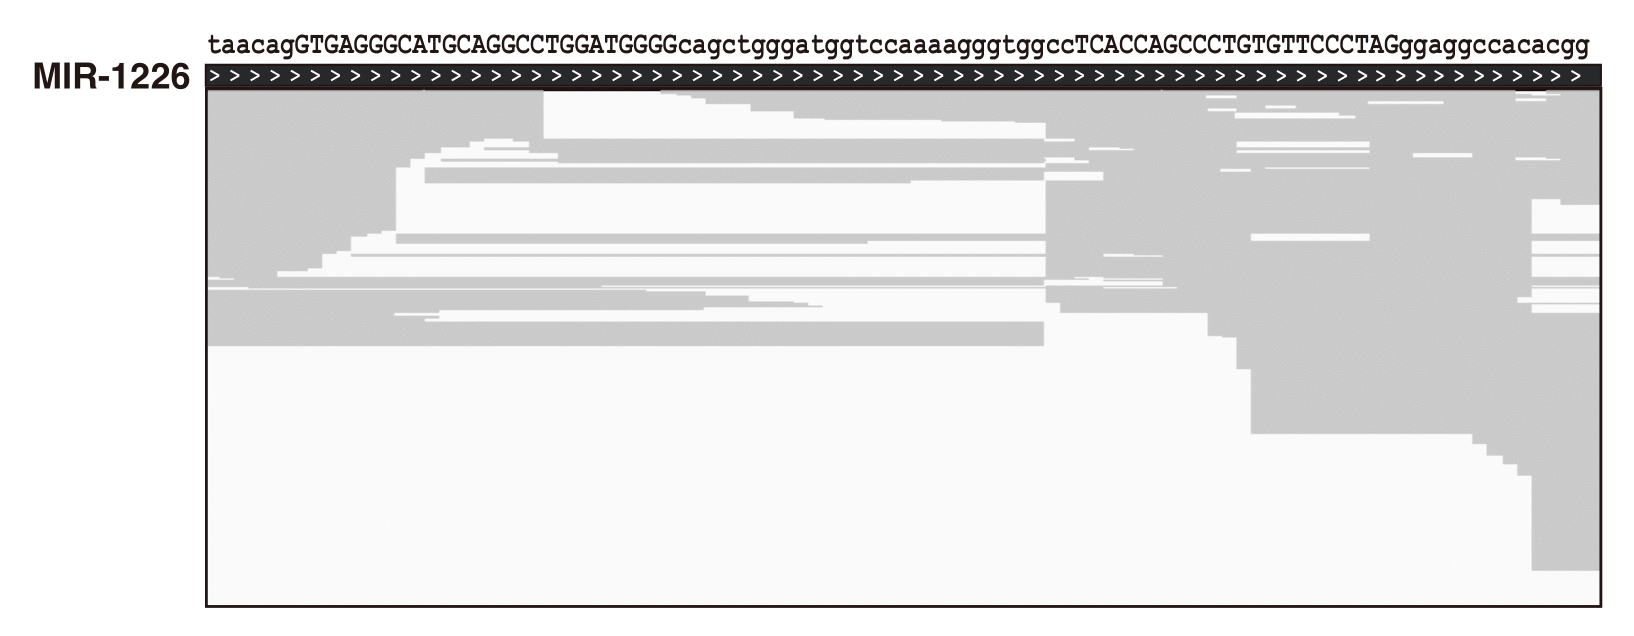

In [16]:
from IPython.display import Image
Image(filename='supplementary/figures/nonspec_mir1226-1.png', width=600)

# G. Association of inverted and productive processing

In [17]:
prs, irs = [], []
s6uniq = s6[~s6.index.duplicated()]
for mir in s6uniq.index:
    inp, prod, inv = s6uniq.loc[mir,['Input','Productively cleaved','Inversely cleaved']]
    invr = (inv+1)/(inp+1)
    prodr = (prod+1)/(inp+1)
    if invr>0 and prodr>0:
        irs.append(invr)
        prs.append(prodr)

In [18]:
xs = np.log2(prs)
ys = np.log2(irs)
color, ecolor = '#969696', '#545454'

Text(-12,4.5,u'N = 1816\nR = 0.14')

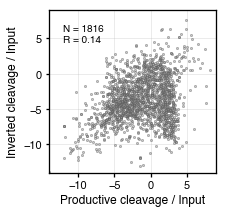

In [19]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(xs,ys,s=5,color=color,lw=.7,edgecolor=ecolor,alpha=.5,zorder=2)

ax.set_xlabel('Productive cleavage / Input', fontsize=12)
ax.set_ylabel('Inverted cleavage / Input', fontsize=12)
ax.set_xlim(-14,9)
ax.set_ylim(-14,9)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.grid(ls='-',lw=.5)
ax.text(-12,4.5,'N = %s\nR = %.2f'%(len(prs),pearsonr(prs,irs)[0]))
#fig.savefig(resultpath + '200909_s2g__prod_inv_association.pdf')

# H. Selection of Cleavage Productivity and Cleavage Specificity cutoffs

In [20]:
window = 3

In [21]:
pros = s6['Cleavage Productivity'].to_dict()
s6sort = s6.sort_values('Cleavage Specificity')
spes = s6sort[~s6sort.index.duplicated(keep='last')]['Cleavage Specificity'].to_dict()
overlap = [ mir for mir in pros if mir in spes ]
print len(overlap)

1816


In [22]:
trues = [ m for m in drosensitive if m in overlap ]
falses = [ m for m in mirtrons if m in overlap ]
print len(trues), len(falses)

155 237


In [23]:
cpcuts = np.arange(0,2.1,.2)
cscuts = np.arange(.3,.51,.02)
tprtbl, tnrtbl = pd.DataFrame(), pd.DataFrame()
for cpcut in cpcuts:
    for cscut in cscuts:
        accept = [ m for m in overlap if pros[m]>=cpcut and spes[m]>=cscut ]
        tpr = len([ m for m in trues if m in accept ])/len(trues)*100
        tnr = len([ m for m in falses if m not in accept])/len(falses)*100
        tprtbl.loc[cscut,cpcut] = tpr
        tnrtbl.loc[cscut,cpcut] = tnr

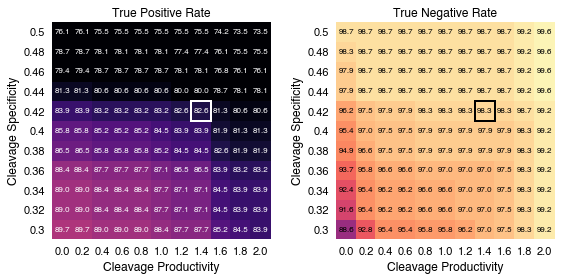

In [24]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,4))
for ax, tbl, c in zip([ax1,ax2],[tprtbl,tnrtbl],['w','k']):
    im = ax.pcolor(tbl, cmap='magma', vmin=80, vmax=100)
    ax.set_xticks(np.arange(11)+.5)
    ax.set_yticks(np.arange(11)+.5)
    ax.set_xticklabels(map(lambda x:round(x,2),cpcuts))
    ax.set_yticklabels(map(lambda x:round(x,2),cscuts))
    ax.tick_params(left='off',bottom='off')
    ax.spines['bottom'].set_visible(False);ax.spines['left'].set_visible(False)
    ax.set_xlabel('Cleavage Productivity', fontsize=12)
    ax.set_ylabel('Cleavage Specificity', fontsize=12)
    for i,cpcut in enumerate(cpcuts):
        for j,cscut in enumerate(cscuts):
            ax.text(i+.5,j+.5,'%.1f'%tbl.iloc[j,i],color=c,fontsize=8,ha='center',va='center')
    sq = plt.Rectangle((7,6),1,1,lw=2,edgecolor=c,facecolor='None');ax.add_patch(sq)
ax1.set_title('True Positive Rate',fontsize=12)
ax2.set_title('True Negative Rate',fontsize=12)
fig.subplots_adjust(wspace=.3)
#fig.savefig(resultpath + '200909_s2b__set_cutoff.pdf')

# I. Cutoff for alternative cleavage sites

In [25]:
clvpro = s6[s6['Cleavage Specificity']>0]
spec2 = []
for mir in set(clvpro.index):
    sub = clvpro.loc[[mir]].sort_values('Cleavage Specificity', ascending=False)
    if len(sub)==1:
        spec2.append(0)
    else:
        spec2.append(sub['Cleavage Specificity'].tolist()[1])

In [26]:
vs, ts = np.histogram(spec2, bins=np.arange(0,1.01,.02))
x = (ts[1:]+ts[:-1])/2
y = vs.cumsum()/vs.sum()*100
color = 'black'
lw = 1.5

Text(0.27,94,u'95th percentile = 0.26')

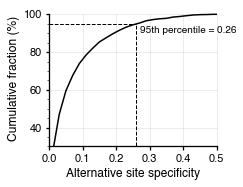

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(3,2.5))
hist = ax.plot(x, y, color=color, lw=lw)

ax.set_xlim(0,.5)
ax.set_ylim(30,102)
ax.set_xticks(np.arange(0,.51,.1))
ax.set_yticks(np.arange(30,101,5), minor=True)
ax.set_ylabel('Cumulative fraction (%)', fontsize=12)
ax.set_xlabel('Alternative site specificity', fontsize=12)
ax.spines['left'].set_bounds(30,100)
gr = plt.Rectangle((0,0), .51, 100, fc='w'); ax.add_patch(gr)
ax.grid(ls='-', clip_path=gr, lw=.5)
for cut in np.arange(0,1.01,.02):
    if len([s for s in spec2 if s>=cut+.02])<.05*len(spec2)<len([s for s in spec2 if s>=cut]):
        break
ax.plot([0,cut], [95,95], ls='--', c='k', lw=1)
ax.plot([cut,cut], [0,95], ls='--', c='k', lw=1)
ax.text(.27, 94, '95th percentile = 0.26', va='top')
#fig.savefig(resultpath + '200728_s2e_cutoff_alternative_site.pdf')

# J. Cutoff for nick cleavage

In [28]:
imbals = {}
for mir in overlap:
    imbals[mir] = s6.loc[mir, 'Cleavage Imbalance'].sum()

In [29]:
xs = sorted(imbals.keys(), key=lambda x: imbals[x], reverse=True)
ys = sorted(imbals.values(), reverse=True)
xmin, xmax = -30, len(xs)+10
ymin, ymax = -.8, .8
lw = 1.8
color = 'black'

In [30]:
def reshape_list(l, n):
    if len(l)<=n:
        return [l]
    return [l[:n]]+reshape_list(l[n:], n)

In [31]:
ms5n = ['hsa-mir-106a','hsa-mir-17','hsa-mir-15a','hsa-mir-451a']
highlight = 100

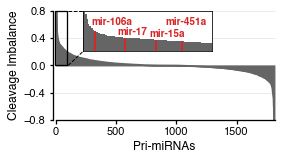

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))
ax.plot(range(len(ys)), ys, lw=lw, c='#656565')
ax.fill_between(range(len(ys)), [0]*len(ys), ys, zorder=2, color='#656565')

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_yticks(np.arange(ymin,ymax+.1,.4))
ax.set_xlabel('Pri-miRNAs', fontsize=12)
ax.set_ylabel('Cleavage Imbalance', fontsize=12)

ax.spines['bottom'].set_bounds(0, len(xs))
gr = plt.Rectangle((-10,ymin), xmax+10, ymax-ymin, fc='w'); ax.add_patch(gr)
ax.yaxis.grid(ls='-', clip_path=gr, lw=.5)

sq = plt.Rectangle((-10,0),100,.8, edgecolor='k', lw=1.3, facecolor='None')
sq.set_clip_on(False); ax.add_patch(sq); sq.set_zorder(3)
l = lines.Line2D([100,220], [0,.2], lw=1, color='k', ls='--'); ax.add_line(l)
l = lines.Line2D([100,220], [.8,.8], lw=1, color='k', ls='--')
l.set_clip_on(False); ax.add_line(l)

ax2 = fig.add_axes([.23,.6,.45,.28], ax)
colors = [ '#656565' if m not in ms5n else 'tab:red' for m in xs[:highlight] ]
ax2.bar(range(highlight), ys[:highlight], color=colors, zorder=2, width=1, align='edge')
for m, xo, yo in zip(ms5n, [-2,-5,-5,-12], [.12,.06,.06,.36]):
    ax2.text(xs.index(m)+xo,imbals[m]+yo,m.replace('hsa-',''),color='tab:red',fontweight='bold')
ax2.set_xlim(0, highlight)
ax2.set_ylim(0, max(ys))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)
for side in ['right','left','top','bottom']:
    ax2.spines[side].set_linewidth(.8)
#fig.savefig(resultpath + '200612_s2f_nick_pervasive.pdf')

In [33]:
vs, ts = np.histogram(ys, bins=np.arange(-1, 1.01, .01))
xs = (ts[1:]+ts[:-1])/2
ys = vs.cumsum()/vs.sum()*100
lw = 1.5
color = 'black'
cut = .2

Text(-0.2,8,u'5th = -0.2')

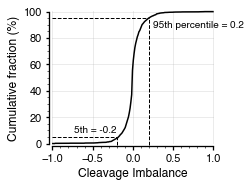

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3,2.5))
ax.plot(xs, ys, lw=lw, color=color, zorder=2)

ax.set_xlim(-1.04, 1.04)
ax.set_ylim(-2, 101)
ax.set_xticks(np.arange(-1,1.1,.1), minor=True)
ax.set_yticks(range(0,101,5), minor=True)
ax.set_xlabel('Cleavage Imbalance', fontsize=12)
ax.set_ylabel('Cumulative fraction (%)', fontsize=12)
ax.spines['left'].set_bounds(0, 100)
ax.spines['bottom'].set_bounds(-1, 1)

gr = plt.Rectangle((-1.01,-.5), 2.02, 100.6, fc='w'); ax.add_patch(gr)
ax.grid(ls='-', clip_path=gr, lw=.5)

ax.plot([-1,cut], [95,95], ls='--', c='k', lw=1)
ax.plot([cut,cut], [-1,95], ls='--', c='k', lw=1)
ax.plot([-1,-cut], [5,5], ls='--', c='k', lw=1)
ax.plot([-cut,-cut], [-1,5], ls='--', c='k', lw=1)

ax.text(.25, 93, '95th percentile = 0.2', va='top')
ax.text(-.2, 8, '5th = -0.2', ha='right')
#fig.savefig(resultpath + '200728_s2c_cutoff_nick_cleavage.pdf')

# K. Terminal loop size

In [35]:
minss = 1
optiaj = 22

In [48]:
def get_str_info(mir):
    ctinfo = [ (int(i),pair) for i,pair in s5.iloc[:,:125].loc[mir].items() ]
    return ctinfo

In [49]:
loopsize = {}
for mir in overlap:
    ps, pe = preposition[mir]
    constseq = constseqs[mir]
    strinfo = get_str_info(mir)
    usteml, ajpos = find_apical_junction(mir, minss, ps, pe, constseq, strinfo, optiaj)
    if usteml:
        loopsize[mir] = ajpos[1]-ajpos[0]-1
print len(loopsize)

1807


In [50]:
single = set(s6[s6['Cleavage type']=='single'].index)
multi = set(s6[s6['Cleavage type']=='multiple'].index)
inverted = set(s6[s6['Cleavage type']=='inverted'].index)
nick5 = set(s6[s6['Cleavage type']=='nick5'].index)
nick3 = set(s6[s6['Cleavage type']=='nick3'].index)
nick = list(nick5) + list(nick3)
nonspec = set(s6[s6['Cleavage type']=='non-specific'].index)
dcsmirs = list(single) + list(multi)
nodcs = list(inverted) + list(nick) + list(nonspec)
print 'Productive: %s, Unproductive: %s' % (len(dcsmirs), len(nodcs))
print 'Single: %s, Multiple: %s, Inverted: %s, Nick: %s, Non-specific: %s'\
% (len(single), len(multi), len(inverted), len(nick), len(nonspec))
print "5' nick: %s, 3' nick: %s" % (len(nick5), len(nick3))

Productive: 512, Unproductive: 1304
Single: 445, Multiple: 67, Inverted: 156, Nick: 107, Non-specific: 1041
5' nick: 72, 3' nick: 35


In [51]:
xmin, xmax = 2, 30
xs = range(xmin, xmax+1)
mirs1 = [ m for m in dcsmirs if m in loopsize ]
mirs2 = [ m for m in nick if m in loopsize ]
mirs3 = [ m for m in inverted if m in loopsize ]
mirs4 = [ m for m in nodcs if m in loopsize ]
ys1 = [ len([m for m in mirs1 if loopsize[m]==l])/len(mirs1)*100 for l in xs ]
ys2 = [ len([m for m in mirs2 if loopsize[m]==l])/len(mirs2)*100 for l in xs ]
ys3 = [ len([m for m in mirs3 if loopsize[m]==l])/len(mirs3)*100 for l in xs ]
ys4 = [ len([m for m in mirs4 if loopsize[m]==l])/len(mirs4)*100 for l in xs ]
c1,c2,c3,c4 = '#1b9e77 #e7298a #d95f02 #242424'.split()
lw = 1.8
ymax = max(max(ys1), max(ys2),max(ys3), max(ys4))
med1 = np.median([loopsize[m] for m in mirs1])
med2 = np.median([loopsize[m] for m in mirs2])
med3 = np.median([loopsize[m] for m in mirs3])
med4 = np.median([loopsize[m] for m in mirs4])
print ymax, med1, med2, med3, med4

13.1115459883 13.0 11.0 11.0 12.0


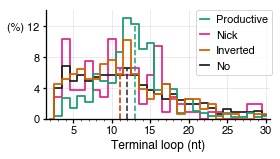

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))
ax.step(xs, ys1, where='mid', c=c1, lw=lw, zorder=3, label='Productive')
ax.step(xs, ys2, where='mid', c=c2, lw=lw, zorder=2, label='Nick')
ax.step(xs, ys3, where='mid', c=c3, lw=lw, zorder=3, label='Inverted')
ax.step(xs, ys4, where='mid', c=c4, lw=lw, zorder=2, label='No')

ax.set_xlim(xmin-.5, xmax+.5)
ax.set_ylim(0, ymax+1)
ax.set_xticks(range(5, xmax+1, 5))
ax.set_xticks(range(xmin,xmax),minor=True)
ax.set_yticks(range(0, int(ymax)+1, 4))
ax.set_yticklabels([0, 4, 8, '(%) 12'])
ax.set_xlabel('Terminal loop (nt)', fontsize=12)
ax.grid(ls='-', lw=.5)
ax.legend(loc=(.67, .4), prop={'size':11}, handlelength=.8, handletextpad=.6)

ax.plot([med1,med1], [0,ys1[int(med1)-xmin]], color=c1, ls='--', lw=1.5)
ax.plot([med2,med2], [0,ys2[int(med2)-xmin]], color=c2, ls='--', lw=1.5)
ax.plot([med3,med3], [0,ys3[int(med3)-xmin]], color=c3, ls='--', lw=1.5)
ax.plot([med4,med4], [0,ys4[int(med4)-xmin]], color=c4, ls='--', lw=1.5)

#fig.savefig(resultpath + '200909_s2k__loop_size_v2.pdf')